In [1]:
#import importlib
import claims_over_time_plot
import get_data
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
from get_data import get_data,get_data_withcovid
from claims_over_time_plot import summarize, claims_by_trump_support, covid_by_trump_support
#\from isoweek import Week
import os
#importlib.reload(get_data)
#importlib.reload(bayes_model_summary)


In [2]:
# from bayes_estimate import estimate_regression
import gc

def trump_support_model_free(filename):
    
    filename_parts = filename.split('/')
    drug_name = filename_parts[-2]
    clean_fname = filename_parts[-1].replace('.csv','') #+ "_" + filename_parts[-2]
    graphs_path = "Processed Data/state_week/model_free/" +drug_name + "/"  + '/Graphs'
    
    
    path_creator(graphs_path)
    path_creator(graphs_path+"_stdz")
    
    print(clean_fname +'\n')

In [3]:
import os
def path_creator(path):
    """
    Creates a path of any depth.
    Note the path is created relative to code folder
    Do not start path with '../' - the function will handle that
    Example: 'Model Free/Chicago'
    returns nothing
    """
    
    paths = path.split('/')
    print(paths)
    new_path ='../{}/'
    for p in paths:
        if not os.path.exists(new_path.format(p)):
            new_path = new_path.format(p)
            print(new_path)
            try:
                os.makedirs(new_path.format(p))
            except:
                print(new_path.format(p)," : Already Exists")
            new_path = new_path+'/{}/'
        else:
            new_path = new_path.format(p)
            new_path = new_path+'/{}/'

In [4]:
def plot_data(filename_red='../Processed Data/state_week/synth_data/ivermectin/actual_claim_count_trump_1_2016_covid.csv', filename_blue='../Processed Data/state_week/synth_data/ivermectin/actual_claim_count_trump_0_2016_covid.csv'):
    
    filename_parts = filename_red.split('/')
    drug_name = filename_parts[-2]
    clean_fname = filename_parts[-1].replace('.csv','') #+ "_" + filename_parts[-2]
    graphs_path = "Processed Data/state_week/model_free/" +drug_name + "/"  + '/Graphs'
    
    
    path_creator(graphs_path)
    path_creator(graphs_path+"_stdz")
    
    # print(clean_fname +'\n')
    # print('\n')
    suffix = clean_fname
    suffix = "claims_by_trump_support"
    covid_label_red = "Red States: Covid Cases per 100,000 people"
    covid_label_blue = "Blue States: Covid Cases per 100,000 people"
    y_covid_label_red = "Covid Cases per 100,000 people"
    y_covid_label_blue = ""
    
    
    if "claim" in filename_red:
        title = "\n Actual Prescription Claims (Indexed) for IVM in Red and Blue States"
        covid_title = "\n Covid Cases in Red and Blue States"
        y_label_red = "Indexed Claim Count per 100,000 people (IVM) (Red States)"
        y_label_blue = "Indexed Claim Count per 100,000 people (IVM) (Blue States)"
    elif 'first' in f:
        title ="\n Actual and Predicted First Person Count (IVM) (Indexed) for HCQ and Covid Cases"
        y_label = "Indexed First Person Count (IVM)"    
    elif 'person' in f:
        title ="\n Actual and Predicted Person Count (IVM) (Indexed) for HCQ and Covid Cases"
        y_label = "Indexed Person Count (IVM)"    
    elif 'days' in f:
        title ="\n Actual and Predicted Prescription Total Days Supply(Indexed) for HCQ and Covid Cases"
        y_label = "Indexed Total Days Supply (HCQ)"   
    
    scale= True
    
    #title.replace("_","")
    X_all,y_all_red, X_train, y_train,y_scaler, time_labels, covid_cases_red, skip = get_data_withcovid(filename_red,scale=scale,remove={'trend', 'y','Unnamed: 0','pre_period','time_index','treat_post','year','week','trend', 'covid_cases','week_date'})
    X_all,y_all_blue, X_train, y_train,y_scaler, time_labels, covid_cases_blue, skip = get_data_withcovid(filename_blue,scale=scale,remove={'trend', 'y','Unnamed: 0','pre_period','time_index','treat_post','year','week','trend', 'covid_cases','week_date'})

    vlinepos=[y_train.shape[0],y_train.shape[0]+12]
    
    
    # print(vlinepos)
    # covid_blue = pd.read_csv("Data_IB/Covid_national_blue.csv")
    #covid_cases=None
    claims_by_trump_support(y_all_red=y_all_red, y_all_blue=y_all_blue, vlinepos=vlinepos, title=title, y_label_red=y_label_red, y_label_blue=y_label_blue, xname='Weeks', opath='../'+graphs_path, suffix='claims_by_trump_support', time_labels=time_labels,drug_name="ivermectin", treat_pos=0)
    covid_by_trump_support(covid_cases_red=covid_cases_red, covid_cases_blue=covid_cases_blue, vlinepos=vlinepos, title=covid_title, covid_label_red=covid_label_red, covid_label_blue=covid_label_blue, y_covid_label_red=y_covid_label_red, y_covid_label_blue=y_covid_label_blue, xname='Weeks', opath='../'+graphs_path, suffix='claims_by_trump_support', time_labels=time_labels, drug_name="ivermectin", treat_pos=0)
    
    
    gc.collect()
    return {'estimable': clean_fname, "y_scaler" : y_scaler, }

['Processed Data', 'state_week', 'model_free', 'ivermectin', '', 'Graphs']
['Processed Data', 'state_week', 'model_free', 'ivermectin', '', 'Graphs_stdz']


/root/gdrive_folder/GoodRx/Ivermectin JASA Share/Code Model Free Ivm/claims_over_time_plot.py:231: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(time[33:], y_all_red[33:], lw =1.5, color=colors[2], label = 'Actual IVM Claims (Red States)', linestyle="-", marker='')
/root/gdrive_folder/GoodRx/Ivermectin JASA Share/Code Model Free Ivm/claims_over_time_plot.py:291: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax2.plot_date(time[33:], y_all_blue[33:], lw =1.5, color=colors[1], label = 'Actual IVM Claims (Blue States)', linestyle="-", marker='')


[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 155]
FILEPATH ../Processed Data/state_week/model_free/ivermectin//Graphs/claims_by_trump_support.png


/root/gdrive_folder/GoodRx/Ivermectin JASA Share/Code Model Free Ivm/claims_over_time_plot.py:573: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(time[33:], covid_cases_red, lw =1, color=colors[2], label = covid_label_red, linestyle="--", marker='')
/root/gdrive_folder/GoodRx/Ivermectin JASA Share/Code Model Free Ivm/claims_over_time_plot.py:577: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(time[33:], covid_cases_blue, lw =1, color=colors[1], label = covid_label_blue, linestyle="--", marker='')
/root/gdrive_folder/GoodRx/Ivermectin JASA Share/Code Model Free Ivm/claims_over_time_plot.py:187: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().t

[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 155]


{'estimable': 'actual_claim_count_trump_1_2016_covid',
 'y_scaler': StandardScaler()}

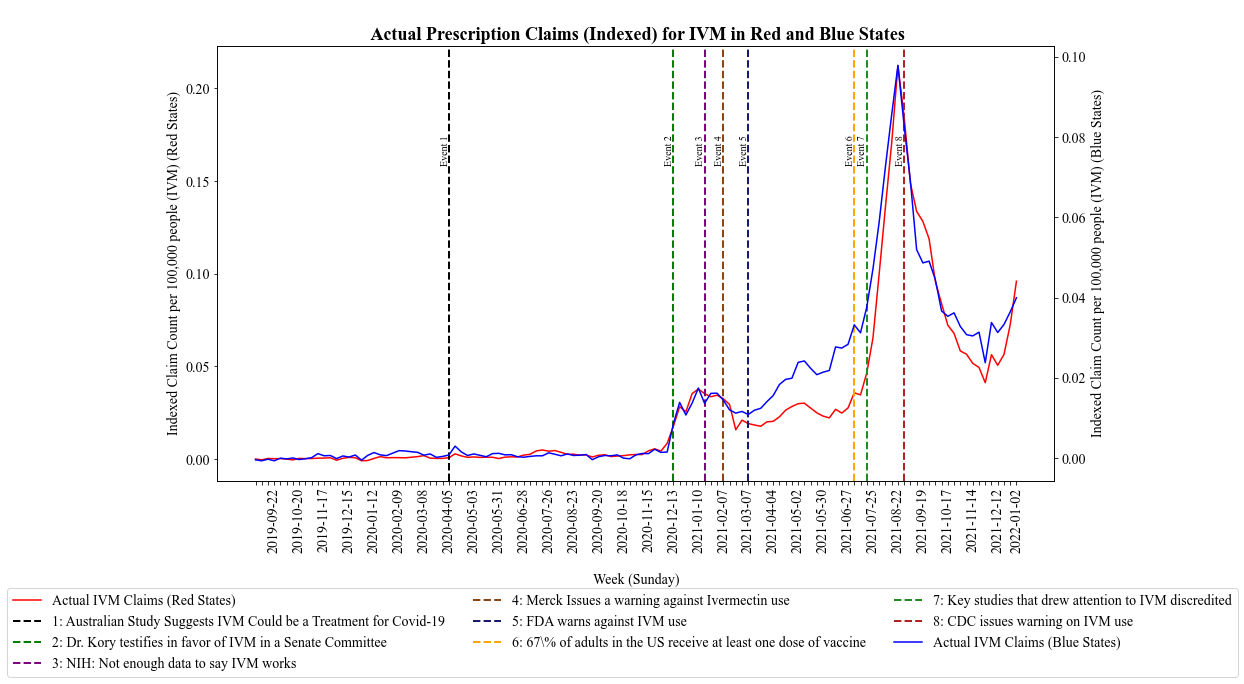

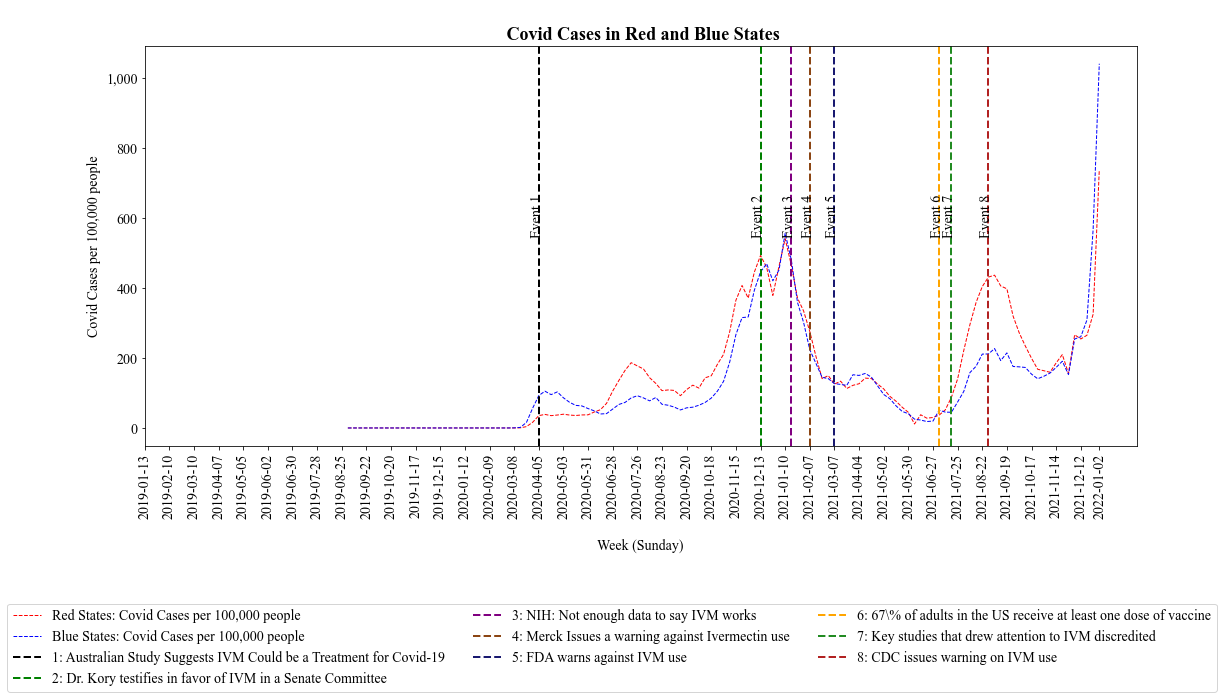

In [5]:
plot_data()